In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

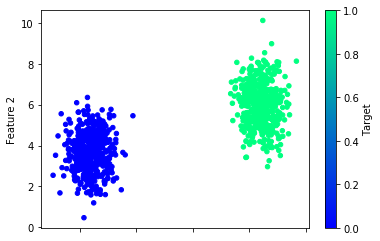

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 2s 3ms/sample - loss: 0.6318 - accuracy: 0.8653
Epoch 2/100
750/750 [==============================] - 0s 143us/sample - loss: 0.6225 - accuracy: 0.8920
Epoch 3/100
750/750 [==============================] - 0s 132us/sample - loss: 0.6121 - accuracy: 0.9253
Epoch 4/100
750/750 [==============================] - 0s 176us/sample - loss: 0.6008 - accuracy: 0.9427
Epoch 5/100
750/750 [==============================] - 0s 127us/sample - loss: 0.5884 - accuracy: 0.9613
Epoch 6/100
750/750 [==============================] - 0s 131us/sample - loss: 0.5754 - accuracy: 0.9667
Epoch 7/100
750/750 [==============================] - 0s 138us/sample - loss: 0.5617 - accuracy: 0.9813
Epoch 8/100
750/750 [==============================] - 0s 126us/sample - loss: 0.5474 - accuracy: 0.9880
Epoch 9/100
750/750 [==============================] - 0s 151us/sample - loss: 0.5328 - accuracy: 0.9920
Epoch 10/100
750/750 [==============

750/750 [==============================] - 0s 205us/sample - loss: 0.0996 - accuracy: 1.0000
Epoch 79/100
750/750 [==============================] - 0s 108us/sample - loss: 0.0979 - accuracy: 1.0000
Epoch 80/100
750/750 [==============================] - 0s 98us/sample - loss: 0.0963 - accuracy: 1.0000
Epoch 81/100
750/750 [==============================] - 0s 108us/sample - loss: 0.0947 - accuracy: 1.0000
Epoch 82/100
750/750 [==============================] - 0s 105us/sample - loss: 0.0931 - accuracy: 1.0000
Epoch 83/100
750/750 [==============================] - 0s 112us/sample - loss: 0.0916 - accuracy: 1.0000
Epoch 84/100
750/750 [==============================] - 0s 121us/sample - loss: 0.0902 - accuracy: 1.0000
Epoch 85/100
750/750 [==============================] - 0s 126us/sample - loss: 0.0887 - accuracy: 1.0000
Epoch 86/100
750/750 [==============================] - 0s 116us/sample - loss: 0.0873 - accuracy: 1.0000
Epoch 87/100
750/750 [==============================] - 0s 1

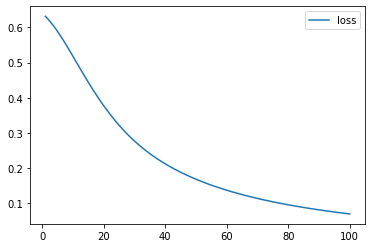

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

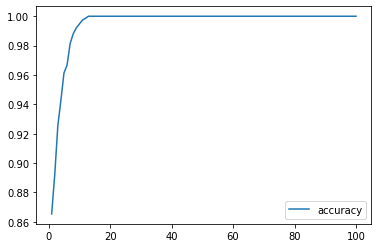

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/1 - 0s - loss: 0.0741 - accuracy: 1.0000
Loss: 0.06605259430408478, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

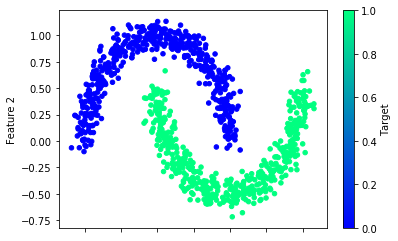

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 229us/sample - loss: 0.7853 - accuracy: 0.6213
Epoch 2/100
750/750 [==============================] - 0s 148us/sample - loss: 0.7050 - accuracy: 0.6427
Epoch 3/100
750/750 [==============================] - 0s 158us/sample - loss: 0.6495 - accuracy: 0.6573
Epoch 4/100
750/750 [==============================] - 0s 138us/sample - loss: 0.6090 - accuracy: 0.6720
Epoch 5/100
750/750 [==============================] - 0s 146us/sample - loss: 0.5786 - accuracy: 0.6827
Epoch 6/100
750/750 [==============================] - 0s 137us/sample - loss: 0.5546 - accuracy: 0.6920
Epoch 7/100
750/750 [==============================] - 0s 135us/sample - loss: 0.5350 - accuracy: 0.7040
Epoch 8/100
750/750 [==============================] - 0s 119us/sample - loss: 0.5182 - accuracy: 0.7120
Epoch 9/100
750/750 [==============================] - 0s 126us/sample - loss: 0.5038 - accuracy: 0.7187
Epoch 10/100
750/750 [============

750/750 [==============================] - 0s 143us/sample - loss: 0.2671 - accuracy: 0.8907
Epoch 78/100
750/750 [==============================] - 0s 109us/sample - loss: 0.2666 - accuracy: 0.8933
Epoch 79/100
750/750 [==============================] - 0s 107us/sample - loss: 0.2661 - accuracy: 0.8933
Epoch 80/100
750/750 [==============================] - 0s 106us/sample - loss: 0.2656 - accuracy: 0.8933
Epoch 81/100
750/750 [==============================] - 0s 120us/sample - loss: 0.2652 - accuracy: 0.8933
Epoch 82/100
750/750 [==============================] - 0s 123us/sample - loss: 0.2648 - accuracy: 0.8933
Epoch 83/100
750/750 [==============================] - 0s 105us/sample - loss: 0.2644 - accuracy: 0.8933
Epoch 84/100
750/750 [==============================] - 0s 109us/sample - loss: 0.2640 - accuracy: 0.8933
Epoch 85/100
750/750 [==============================] - 0s 122us/sample - loss: 0.2636 - accuracy: 0.8933
Epoch 86/100
750/750 [==============================] - 0s 

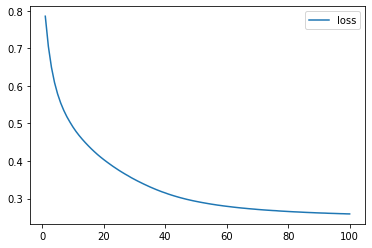

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

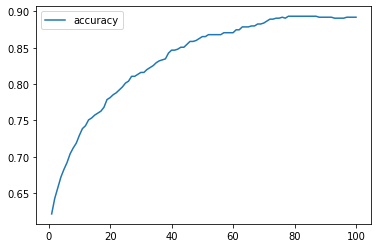

In [19]:
# Plot the loss
history_df.plot(y="accuracy")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 2ms/sample - loss: 0.8163 - accuracy: 0.4693
Epoch 2/100
750/750 [==============================] - 0s 122us/sample - loss: 0.7668 - accuracy: 0.4693
Epoch 3/100
750/750 [==============================] - 0s 114us/sample - loss: 0.7239 - accuracy: 0.4680
Epoch 4/100
750/750 [==============================] - 0s 127us/sample - loss: 0.6856 - accuracy: 0.4560
Epoch 5/100
750/750 [==============================] - 0s 133us/sample - loss: 0.6525 - accuracy: 0.4453
Epoch 6/100
750/750 [==============================] - 0s 119us/sample - loss: 0.6231 - accuracy: 0.4587
Epoch 7/100
750/750 [==============================] - 0s 123us/sample - loss: 0.5973 - accuracy: 0.5080
Epoch 8/100
750/750 [==============================] - 0s 123us/sample - loss: 0.5742 - accuracy: 0.5507
Epoch 9/100
750/750 [==============================] - 0s 129us/sample - loss: 0.5538 - accuracy: 0.5707
Epoch 10/100
750/750 [==============

750/750 [==============================] - 0s 115us/sample - loss: 0.2218 - accuracy: 0.9053
Epoch 79/100
750/750 [==============================] - 0s 115us/sample - loss: 0.2212 - accuracy: 0.9053
Epoch 80/100
750/750 [==============================] - 0s 103us/sample - loss: 0.2208 - accuracy: 0.9067
Epoch 81/100
750/750 [==============================] - 0s 106us/sample - loss: 0.2205 - accuracy: 0.9067
Epoch 82/100
750/750 [==============================] - 0s 104us/sample - loss: 0.2201 - accuracy: 0.9080
Epoch 83/100
750/750 [==============================] - 0s 99us/sample - loss: 0.2197 - accuracy: 0.9080
Epoch 84/100
750/750 [==============================] - 0s 105us/sample - loss: 0.2194 - accuracy: 0.9080
Epoch 85/100
750/750 [==============================] - 0s 105us/sample - loss: 0.2191 - accuracy: 0.9080
Epoch 86/100
750/750 [==============================] - 0s 102us/sample - loss: 0.2187 - accuracy: 0.9080
Epoch 87/100
750/750 [==============================] - 0s 1